# Example of Obspy Read sac file

### <font color='red'>Read the SAC data file
</font> 

In [2]:
from obspy.core import read

#For reading the file in external storage
st = read('data/LNY03_EW.acc')

#Output for general information
print(st)

1 Trace(s) in Stream:
SG.LNY03..VBE | 2009-05-19T18:17:00.000000Z - 2009-05-19T18:33:39.990000Z | 100.0 Hz, 100000 samples


#### More detail information

In [3]:
print(st[0].stats)

         network: SG
         station: LNY03
        location: 
         channel: VBE
       starttime: 2009-05-19T18:17:00.000000Z
         endtime: 2009-05-19T18:33:39.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 100000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmin': -0.12027301, 'depmax': 0.110204965, 'b': 0.0, 'e': 999.99, 'o': 180.0, 'a': 181.84122, 'internal0': 2.0, 'f': 193.78113, 'stla': 25.3799, 'stlo': 37.8543, 'stel': 500.0, 'stdp': 0.0, 'evla': 25.282, 'evlo': 37.767, 'evdp': 9.62, 'mag': 4.29, 'dist': 13.9597645, 'az': 39.00464, 'baz': 219.04178, 'gcarc': 0.12547848, 'depmen': -1.4338675e-11, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2009, 'nzjday': 139, 'nzhour': 18, 'nzmin': 17, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 100000, 'iftype': 1, 'idep': 8, 'leven': 1, 'lpspol': 0, 'lcalda': 1, 'unused23': 0, 'kstnm': 'LNY03   ', 'khole': '        ', 'ka': '        ', 'kcmp

#### Extract the event date and station name

In [4]:
print(st[0].stats.starttime)
cha = str(st[0].stats.starttime)
sl = cha[0:19]
station = st[0].stats.station
print(sl,station)

2009-05-19T18:17:00.000000Z
2009-05-19T18:17:00 LNY03


#### Pick up the header values

In [5]:
print(st[0].stats.sac.o)
print(st[0].stats.sac.dist)
a = st[0].stats.sac.dist

180.0
13.9597645


#### The waveform data is stored in the data attribute

In [6]:
y = st[0].data
print(y)

[ 5.1650759e-06 -1.5836858e-05 -3.4473080e-06 ... -9.4521982e-07
  1.2510756e-06 -2.1727444e-06]


#### Creating the time array

In [7]:
import numpy as np

dt = st[0].stats.sac.delta
Num = st[0].stats.npts
x = np.linspace(0,Num*dt,Num)
print(x)

[0.00000000e+00 1.00000998e-02 2.00001996e-02 ... 9.99979977e+02
 9.99989978e+02 9.99999978e+02]


#### Drawing waveform

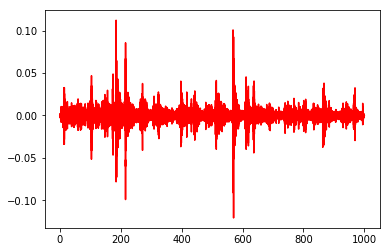

In [8]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'r-')
plt.show()

#### Cutting the time window from a to f
https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.trim.html
#### <font color='red'>Trace module is included in trace!
</font> 


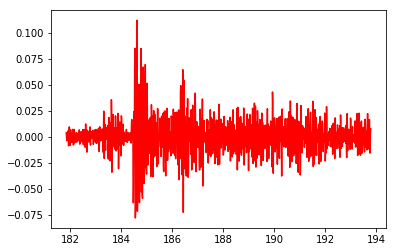

In [9]:
from obspy.core.trace import Trace

#Retrieving start and end time
beg = st[0].stats.sac.a
end = st[0].stats.sac.f

#for time array
tr_x = Trace(data=x)
tr_x.stats.delta = dt
t = tr_x.stats.starttime
tr_x.trim(t + beg, t + end)  
tr_x.data

#for amplitude array
tr_y = Trace(data=y)
tr_y.stats.delta = dt
t = tr_y.stats.starttime
tr_y.trim(t + beg, t + end)  
tr_y.data

#Plotting the result
plt.plot(tr_x.data,tr_y.data, 'r-')
plt.show()